In [1]:
import classes
parameters = classes.Empty()
start_position = classes.PosAndTime()
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [20]:
# Параметры модели:
parameters.lmbda = 1    # Целевая средняя длина свободного пробега
parameters.velocity = 1 # Скорость (одинаковая для всех частиц и всех моментов времени)

start_guide_cosines = classes.GuideCosines \
        (a=0.5, c=0.5, b=0.5**0.5) # Направляющие косинусы при t = 0

time_limit = 500        # Время моделирования в единицах лямбда / v 

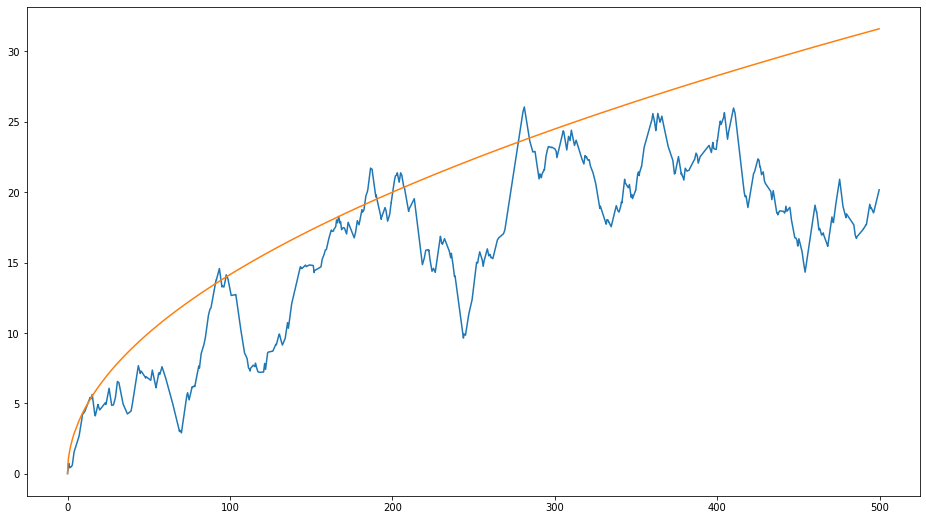

In [21]:
import cycles
one_particle_path = cycles.simulate_one_particle(parameters, start_position, start_guide_cosines, time_limit)
#one_particle_path :: [{x, y, z, t}]

distances = list(map(lambda obj : obj.distance(), one_particle_path))
times     = list(map(lambda obj : obj.t,          one_particle_path))

import theory
theory.setParameters(parameters)
predictions = list(map(theory.distance, times))

from matplotlib import pyplot as plt
plt.figure(figsize=(16,9))
plt.plot(times, distances, times, predictions)

In [22]:
Nparticles = 500

In [26]:
arar = cycles.simulate_multiple_particles(parameters, Nparticles, start_position, start_guide_cosines, time_limit)

In [27]:
tar, mar = cycles.meanDistance(arar, time_limit)

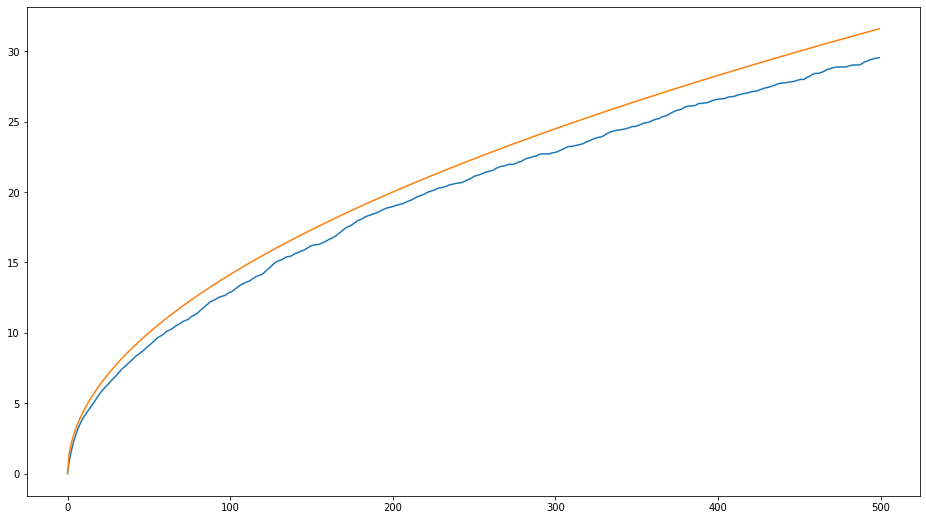

In [28]:
predictions = list(map(theory.distance, tar))

plt.figure(figsize=(16,9))
plt.plot(tar, mar, tar, predictions)

In [8]:
mar[99] / predictions[99]

0.907765374414656

In [9]:
predictions[399] / mar[399]

1.0628042171192125

In [10]:
mar[99] * 9 / 4 - predictions[99]

6.560123727084943

In [11]:
(x, y, z) = cycles.xyDistribution(arar, 100)

In [30]:
%matplotlib qt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(16,9))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x,y,z,cmap=cm.coolwarm)

In [13]:
from between import getBetween
ra = list(map(lambda ar : getBetween(ar, 50), arar))

In [14]:
list(map(lambda obj : obj.y, ra))

[0.278065527373299,
 -3.773829980635377,
 -7.303676975300644,
 6.633009541541246,
 0.15592168399502304,
 -7.735910435088041,
 7.550514011192959,
 0.7677112064074765,
 0.6761399163838606,
 -2.1639387899147104,
 2.0063456889584903,
 -11.051472601817506,
 3.754571086511052,
 -7.1748512189548155,
 -0.9052986114725472,
 -5.561113341041358,
 -0.6420798948394906,
 12.045672132174634,
 -4.165443604576522,
 4.086103917971122,
 1.806160309056671,
 -5.903085876016577,
 -7.092172669531653,
 -0.6789679903293091,
 -0.5423267452726518,
 -1.1313714454252077,
 4.699221449499454,
 -11.464846185077224,
 -2.6469024800790506,
 -1.8388414844573073,
 -2.3142901600617836,
 1.3273775265530992,
 -5.379855455894614,
 -2.4248489381702205,
 15.792016224320019,
 -2.31782488811505,
 3.4389904595803196,
 5.325040949791313,
 -1.3271944575541983,
 -8.262509746326316,
 7.955383477848373,
 -5.918843786647416,
 8.639970933356645,
 1.280725055105034,
 -1.876314273306572,
 1.014330576073544,
 3.261315192725545,
 -1.23760942

In [15]:
parameters.lmbda

1

In [16]:
z[0][5]

0.0

In [17]:
z[0][0]

0.0

In [18]:
z

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
z[25][25]

2.0